In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_************ = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='*********************',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_**********.get_object(Bucket='********',Key='********')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body, parse_dates=True)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540650 entries, 0 to 5540649
Data columns (total 15 columns):
address_type              object
borough                   object
city                      object
closed_date               object
complaint_type            object
created_date              object
incident_address          object
incident_zip              float64
latitude                  float64
location_type             object
longitude                 float64
resolution_description    object
status                    object
street_name               object
unique_key                int64
dtypes: float64(3), int64(1), object(11)
memory usage: 634.1+ MB


In [4]:
df.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BROOKLYN,BROOKLYN,11/23/2015 10:29:49 AM,DOOR/WINDOW,11/7/2015 10:16:55 AM,397 1 STREET,11215.0,40.672571,RESIDENTIAL BUILDING,-73.979307,The Department of Housing Preservation and Dev...,Closed,1 STREET,31929828
1,ADDRESS,MANHATTAN,NEW YORK,1/31/2016 11:50:51 AM,DOOR/WINDOW,11/7/2015 6:50:53 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929829
2,ADDRESS,MANHATTAN,NEW YORK,11/20/2015 9:11:31 AM,DOOR/WINDOW,11/7/2015 11:09:57 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929830
3,ADDRESS,BROOKLYN,BROOKLYN,11/16/2015 12:25:46 PM,DOOR/WINDOW,11/7/2015 2:05:52 PM,1555 NOSTRAND AVENUE,11226.0,40.648298,RESIDENTIAL BUILDING,-73.949293,The Department of Housing Preservation and Dev...,Closed,NOSTRAND AVENUE,31929831
4,ADDRESS,BRONX,BRONX,12/3/2015 9:38:12 AM,DOOR/WINDOW,11/6/2015 1:02:50 PM,1808 MULFORD AVENUE,10461.0,40.847490,RESIDENTIAL BUILDING,-73.835112,The Department of Housing Preservation and Dev...,Closed,MULFORD AVENUE,31929832


In [5]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            1932261
PLUMBING                   673952
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       391136
PAINT - PLASTER            361258
PAINT/PLASTER              311722
ELECTRIC                   289563
NONCONST                   260890
DOOR/WINDOW                179839
WATER LEAK                 168063
GENERAL                    132219
FLOORING/STAIRS            123004
APPLIANCE                  101917
HPD Literature Request      52548
SAFETY                      44195
OUTSIDE BUILDING             6532
ELEVATOR                     5577
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

In [6]:
df['borough'].value_counts()

BROOKLYN         1591614
BRONX            1459233
MANHATTAN         953436
Unspecified       872904
QUEENS            583835
STATEN ISLAND      79628
Name: borough, dtype: int64

In [7]:
df['incident_zip'].value_counts()

11226.0    198677
10467.0    159314
10458.0    156344
10453.0    149041
10468.0    135452
10452.0    133781
10457.0    132046
10456.0    120993
10031.0    113841
11225.0    111825
11213.0    110473
10032.0    102011
11207.0    101668
11233.0     98896
11212.0     98664
11221.0     95789
10460.0     88197
10472.0     86751
10040.0     84088
11216.0     82550
11203.0     81512
11208.0     80925
10033.0     75568
10463.0     72803
10462.0     72670
10034.0     66392
10459.0     65815
10466.0     63458
11230.0     59630
11237.0     57735
            ...  
10282.0       501
10007.0       483
10006.0       405
10005.0       378
10280.0       327
10004.0       294
11697.0       266
11001.0       255
11040.0        95
10069.0        64
11109.0        60
10129.0        40
10162.0        14
11005.0        12
10020.0         4
10803.0         4
10158.0         3
10103.0         3
11430.0         2
11241.0         2
10112.0         2
10041.0         2
11243.0         1
10271.0         1
10279.0   

In [8]:
#Segment "HEAT/HOT WATER" by borough

In [9]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BROOKLYN')]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
165,ADDRESS,BROOKLYN,BROOKLYN,11/8/2015 6:22:39 PM,HEAT/HOT WATER,11/7/2015 3:41:28 PM,435 GRAND AVENUE,11238.0,40.683022,RESIDENTIAL BUILDING,-73.961724,The complaint you filed is a duplicate of a co...,Closed,GRAND AVENUE,31930540
170,ADDRESS,BROOKLYN,BROOKLYN,11/10/2015 9:25:57 AM,HEAT/HOT WATER,11/6/2015 11:46:20 AM,273 LEE AVENUE,11206.0,40.699842,RESIDENTIAL BUILDING,-73.953636,The Department of Housing Preservation and Dev...,Closed,LEE AVENUE,31930549
175,ADDRESS,BROOKLYN,BROOKLYN,11/9/2015 5:23:38 PM,HEAT/HOT WATER,11/6/2015 10:02:16 AM,271 MARTENSE STREET,11226.0,40.651672,RESIDENTIAL BUILDING,-73.950292,The Department of Housing Preservation and Dev...,Closed,MARTENSE STREET,31930563
176,ADDRESS,BROOKLYN,BROOKLYN,11/9/2015 4:12:42 PM,HEAT/HOT WATER,11/6/2015 2:26:26 AM,49 CLARKSON AVENUE,11226.0,40.654947,RESIDENTIAL BUILDING,-73.958071,The Department of Housing Preservation and Dev...,Closed,CLARKSON AVENUE,31930564
178,ADDRESS,BROOKLYN,BROOKLYN,11/7/2015 6:09:51 PM,HEAT/HOT WATER,11/6/2015 4:53:34 PM,652 55 STREET,11220.0,40.640116,RESIDENTIAL BUILDING,-74.009628,The Department of Housing Preservation and Dev...,Closed,55 STREET,31930580
179,ADDRESS,BROOKLYN,BROOKLYN,11/12/2015 8:07:07 AM,HEAT/HOT WATER,11/7/2015 12:58:34 PM,273 HALSEY STREET,11216.0,40.682703,RESIDENTIAL BUILDING,-73.942121,The following complaint conditions are still o...,Closed,HALSEY STREET,31930583
182,ADDRESS,BROOKLYN,BROOKLYN,NaN,HEAT/HOT WATER,11/6/2015 9:42:30 AM,65 PARK AVENUE,11205.0,40.696399,RESIDENTIAL BUILDING,-73.977515,The complaint you filed is a duplicate of a co...,Open,PARK AVENUE,31930590
183,ADDRESS,BROOKLYN,BROOKLYN,11/10/2015 1:14:05 AM,HEAT/HOT WATER,11/6/2015 4:15:17 PM,523 KNICKERBOCKER AVENUE,11221.0,40.697622,RESIDENTIAL BUILDING,-73.916247,The complaint you filed is a duplicate of a co...,Closed,KNICKERBOCKER AVENUE,31930591
185,ADDRESS,BROOKLYN,BROOKLYN,11/9/2015 9:26:58 AM,HEAT/HOT WATER,11/6/2015 1:37:39 AM,263 STOCKHOLM STREET,11237.0,40.701748,RESIDENTIAL BUILDING,-73.920591,The Department of Housing Preservation and Dev...,Closed,STOCKHOLM STREET,31930593
186,ADDRESS,BROOKLYN,BROOKLYN,11/10/2015 2:31:16 PM,HEAT/HOT WATER,11/6/2015 1:44:52 PM,163 MADISON STREET,11216.0,40.684509,RESIDENTIAL BUILDING,-73.952485,The Department of Housing Preservation and Dev...,Closed,MADISON STREET,31930594


In [10]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BROOKLYN')].count()

address_type              505213
borough                   510656
city                      505133
closed_date               507925
complaint_type            510656
created_date              510656
incident_address          510656
incident_zip              505127
latitude                  505127
location_type             510656
longitude                 505127
resolution_description    510600
status                    510656
street_name               510656
unique_key                510656
dtype: int64

In [11]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BRONX')]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
13,ADDRESS,BRONX,BRONX,11/6/2015 11:40:01 AM,HEAT/HOT WATER,11/6/2015 7:06:37 AM,1505 TOWNSEND AVENUE,10452.0,40.842340,RESIDENTIAL BUILDING,-73.915038,The Department of Housing Preservation and Dev...,Closed,TOWNSEND AVENUE,31930038
14,ADDRESS,BRONX,BRONX,11/7/2015 1:08:51 AM,HEAT/HOT WATER,11/6/2015 6:43:48 AM,1390 PROSPECT AVENUE,10459.0,40.831536,RESIDENTIAL BUILDING,-73.896778,The Department of Housing Preservation and Dev...,Closed,PROSPECT AVENUE,31930075
189,ADDRESS,BRONX,BRONX,11/9/2015 5:24:18 PM,HEAT/HOT WATER,11/7/2015 8:23:56 PM,2995 BOTANICAL SQUARE,10458.0,40.867716,RESIDENTIAL BUILDING,-73.881612,The Department of Housing Preservation and Dev...,Closed,BOTANICAL SQUARE,31930602
192,ADDRESS,BRONX,BRONX,11/8/2015 12:52:50 PM,HEAT/HOT WATER,11/7/2015 4:26:04 PM,2351 GRAND CONCOURSE,10468.0,40.858889,RESIDENTIAL BUILDING,-73.899100,The complaint you filed is a duplicate of a co...,Closed,GRAND CONCOURSE,31930609
205,ADDRESS,BRONX,BRONX,11/11/2015 1:11:15 AM,HEAT/HOT WATER,11/7/2015 7:55:25 AM,750 GRAND CONCOURSE,10451.0,40.823104,RESIDENTIAL BUILDING,-73.924572,The Department of Housing Preservation and Dev...,Closed,GRAND CONCOURSE,31930628
221,ADDRESS,BRONX,BRONX,11/10/2015 1:37:22 PM,HEAT/HOT WATER,11/7/2015 6:24:53 AM,888 GRAND CONCOURSE,10451.0,40.826522,RESIDENTIAL BUILDING,-73.922816,The Department of Housing Preservation and Dev...,Closed,GRAND CONCOURSE,31930648
231,ADDRESS,BRONX,BRONX,11/11/2015 1:12:42 AM,HEAT/HOT WATER,11/7/2015 9:11:27 AM,883 EAST 180 STREET,10460.0,40.845205,RESIDENTIAL BUILDING,-73.882863,The complaint you filed is a duplicate of a co...,Closed,EAST 180 STREET,31930658
232,ADDRESS,BRONX,BRONX,11/11/2015 1:10:32 AM,HEAT/HOT WATER,11/7/2015 2:24:28 AM,1834 PHELAN PLACE,10453.0,40.853065,RESIDENTIAL BUILDING,-73.916590,The Department of Housing Preservation and Dev...,Closed,PHELAN PLACE,31930659
475,ADDRESS,BRONX,BRONX,11/11/2015 1:11:15 AM,HEAT/HOT WATER,11/7/2015 9:21:05 PM,930 SHERIDAN AVENUE,10451.0,40.827797,RESIDENTIAL BUILDING,-73.920358,The complaint you filed is a duplicate of a co...,Closed,SHERIDAN AVENUE,31931474
476,ADDRESS,BRONX,BRONX,11/10/2015 1:37:22 PM,HEAT/HOT WATER,11/7/2015 8:49:20 AM,888 GRAND CONCOURSE,10451.0,40.826522,RESIDENTIAL BUILDING,-73.922816,The complaint you filed is a duplicate of a co...,Closed,GRAND CONCOURSE,31931482


In [12]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BRONX')].count()

address_type              527486
borough                   533283
city                      527332
closed_date               531615
complaint_type            533283
created_date              533283
incident_address          533282
incident_zip              527332
latitude                  527332
location_type             533283
longitude                 527332
resolution_description    533259
status                    533283
street_name               533282
unique_key                533283
dtype: int64

In [13]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'MANHATTAN')]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
174,ADDRESS,MANHATTAN,NEW YORK,11/9/2015 8:44:18 AM,HEAT/HOT WATER,11/6/2015 12:19:23 PM,3580 BROADWAY,10031.0,40.827816,RESIDENTIAL BUILDING,-73.949427,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31930562
184,ADDRESS,MANHATTAN,NEW YORK,11/10/2015 9:28:14 PM,HEAT/HOT WATER,11/7/2015 9:47:53 PM,631 HUDSON STREET,10014.0,40.738519,RESIDENTIAL BUILDING,-74.005543,The Department of Housing Preservation and Dev...,Closed,HUDSON STREET,31930592
187,ADDRESS,MANHATTAN,NEW YORK,11/10/2015 9:28:14 PM,HEAT/HOT WATER,11/6/2015 10:45:30 AM,489 BROADWAY,10012.0,40.721856,RESIDENTIAL BUILDING,-73.999812,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31930595
191,ADDRESS,MANHATTAN,NEW YORK,11/6/2015 3:05:39 PM,HEAT/HOT WATER,11/6/2015 10:11:02 AM,551 WEST 157 STREET,10032.0,40.833456,RESIDENTIAL BUILDING,-73.943421,The Department of Housing Preservation and Dev...,Closed,WEST 157 STREET,31930608
200,ADDRESS,MANHATTAN,NEW YORK,11/10/2015 9:28:14 PM,HEAT/HOT WATER,11/7/2015 11:17:23 PM,135 ELDRIDGE STREET,10002.0,40.718995,RESIDENTIAL BUILDING,-73.991544,The complaint you filed is a duplicate of a co...,Closed,ELDRIDGE STREET,31930621
201,ADDRESS,MANHATTAN,NEW YORK,11/6/2015 6:22:36 PM,HEAT/HOT WATER,11/6/2015 8:07:55 AM,2 WEST 129 STREET,10027.0,40.808994,RESIDENTIAL BUILDING,-73.940512,The Department of Housing Preservation and Dev...,Closed,WEST 129 STREET,31930622
216,ADDRESS,MANHATTAN,NEW YORK,11/9/2015 5:23:52 PM,HEAT/HOT WATER,11/7/2015 6:48:41 PM,140 EAST 28 STREET,10016.0,40.742481,RESIDENTIAL BUILDING,-73.982086,The Department of Housing Preservation and Dev...,Closed,EAST 28 STREET,31930643
217,ADDRESS,MANHATTAN,NEW YORK,11/12/2015 4:10:28 PM,HEAT/HOT WATER,11/7/2015 6:29:48 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The complaint you filed is a duplicate of a co...,Closed,BROADWAY,31930644
220,ADDRESS,MANHATTAN,NEW YORK,11/8/2015 3:04:56 PM,HEAT/HOT WATER,11/7/2015 11:39:09 AM,183 EAST 3 STREET,10009.0,40.723103,RESIDENTIAL BUILDING,-73.983967,The Department of Housing Preservation and Dev...,Closed,EAST 3 STREET,31930647
454,ADDRESS,MANHATTAN,NEW YORK,11/10/2015 9:48:07 AM,HEAT/HOT WATER,11/7/2015 10:30:06 PM,502 WEST 142 STREET,10031.0,40.823554,RESIDENTIAL BUILDING,-73.949600,The Department of Housing Preservation and Dev...,Closed,WEST 142 STREET,31931427


In [14]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'MANHATTAN')].count()

address_type              370438
borough                   374978
city                      370393
closed_date               371871
complaint_type            374978
created_date              374978
incident_address          374978
incident_zip              370393
latitude                  370393
location_type             374978
longitude                 370393
resolution_description    374911
status                    374978
street_name               374978
unique_key                374978
dtype: int64

In [15]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'STATEN ISLAND')]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
169,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/10/2015 7:31:42 AM,HEAT/HOT WATER,11/6/2015 5:57:24 PM,85 HOLLAND AVENUE,10303.0,40.638542,RESIDENTIAL BUILDING,-74.171232,The Department of Housing Preservation and Dev...,Closed,HOLLAND AVENUE,31930548
180,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/10/2015 7:31:43 AM,HEAT/HOT WATER,11/6/2015 8:53:13 PM,256 CORSON AVENUE,10301.0,40.636779,RESIDENTIAL BUILDING,-74.086966,The Department of Housing Preservation and Dev...,Closed,CORSON AVENUE,31930585
2168,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/10/2015 7:31:43 AM,HEAT/HOT WATER,11/7/2015 12:59:54 PM,1660 RICHMOND TERRACE,10310.0,40.639358,RESIDENTIAL BUILDING,-74.121625,The Department of Housing Preservation and Dev...,Closed,RICHMOND TERRACE,31936843
2177,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/12/2015 7:08:24 AM,HEAT/HOT WATER,11/7/2015 10:19:53 AM,138 ST PAULS AVENUE,10301.0,40.634358,RESIDENTIAL BUILDING,-74.078626,The Department of Housing Preservation and Dev...,Closed,ST PAULS AVENUE,31936852
2724,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/20/2015 11:11:16 AM,HEAT/HOT WATER,11/8/2015 5:58:27 PM,174 GRANDVIEW AVENUE,10303.0,40.635546,RESIDENTIAL BUILDING,-74.165110,The Department of Housing Preservation and Dev...,Closed,GRANDVIEW AVENUE,31938684
2816,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/12/2015 7:04:11 AM,HEAT/HOT WATER,11/8/2015 9:57:12 AM,30 EBBITTS STREET,10306.0,40.564483,RESIDENTIAL BUILDING,-74.110443,The Department of Housing Preservation and Dev...,Closed,EBBITTS STREET,31939170
3319,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/9/2015 8:28:32 PM,HEAT/HOT WATER,11/8/2015 7:35:23 AM,142 HENDRICKS AVENUE,10301.0,40.640029,RESIDENTIAL BUILDING,-74.086196,The Department of Housing Preservation and Dev...,Closed,HENDRICKS AVENUE,31940981
3719,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/12/2015 1:29:00 PM,HEAT/HOT WATER,11/9/2015 12:21:04 PM,320 VANDERBILT AVENUE,10304.0,40.617481,RESIDENTIAL BUILDING,-74.081499,The Department of Housing Preservation and Dev...,Closed,VANDERBILT AVENUE,31942627
3731,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/12/2015 1:29:00 PM,HEAT/HOT WATER,11/9/2015 10:47:37 AM,44 BRADLEY AVENUE,10314.0,40.611349,RESIDENTIAL BUILDING,-74.132318,The Department of Housing Preservation and Dev...,Closed,BRADLEY AVENUE,31942664
3773,ADDRESS,STATEN ISLAND,STATEN ISLAND,11/12/2015 1:29:00 PM,HEAT/HOT WATER,11/9/2015 3:56:50 PM,228 BENZIGER AVENUE,10301.0,40.639412,RESIDENTIAL BUILDING,-74.085586,The Department of Housing Preservation and Dev...,Closed,BENZIGER AVENUE,31942719


In [16]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'STATEN ISLAND')].count()

address_type              16099
borough                   16252
city                      16091
closed_date               16147
complaint_type            16252
created_date              16252
incident_address          16252
incident_zip              16091
latitude                  16091
location_type             16252
longitude                 16091
resolution_description    16248
status                    16252
street_name               16252
unique_key                16252
dtype: int64

In [17]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'QUEENS')]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
181,ADDRESS,QUEENS,Far Rockaway,11/9/2015 10:03:37 AM,HEAT/HOT WATER,11/6/2015 5:58:10 PM,1314 CENTRAL AVENUE,11691.0,40.607317,RESIDENTIAL BUILDING,-73.749397,The complaint you filed is a duplicate of a co...,Closed,CENTRAL AVENUE,31930586
188,ADDRESS,QUEENS,Jamaica,11/13/2015 8:32:06 AM,HEAT/HOT WATER,11/7/2015 11:48:06 AM,109-12 176 STREET,11433.0,40.699115,RESIDENTIAL BUILDING,-73.779165,The Department of Housing Preservation and Dev...,Closed,176 STREET,31930596
193,ADDRESS,QUEENS,Jackson Heights,11/10/2015 9:34:13 AM,HEAT/HOT WATER,11/6/2015 12:19:27 PM,34-18 91 STREET,11372.0,40.754032,RESIDENTIAL BUILDING,-73.876574,The Department of Housing Preservation and Dev...,Closed,91 STREET,31930610
197,ADDRESS,QUEENS,Corona,11/10/2015 1:23:00 PM,HEAT/HOT WATER,11/7/2015 8:41:11 AM,97-05 HORACE HARDING EXPRESSWAY,11368.0,40.734899,RESIDENTIAL BUILDING,-73.862526,The complaint you filed is a duplicate of a co...,Closed,HORACE HARDING EXPRESSWAY,31930615
208,ADDRESS,QUEENS,South Richmond Hill,11/9/2015 9:38:21 PM,HEAT/HOT WATER,11/6/2015 4:23:25 PM,97-38 110 STREET,11419.0,40.689192,RESIDENTIAL BUILDING,-73.834455,The complaint you filed is a duplicate of a co...,Closed,110 STREET,31930631
209,ADDRESS,QUEENS,Astoria,11/10/2015 8:36:02 PM,HEAT/HOT WATER,11/7/2015 5:00:07 PM,20-72A STEINWAY STREET,11105.0,40.775025,RESIDENTIAL BUILDING,-73.903426,The Department of Housing Preservation and Dev...,Closed,STEINWAY STREET,31930635
218,ADDRESS,QUEENS,South Richmond Hill,11/9/2015 9:38:21 PM,HEAT/HOT WATER,11/6/2015 5:07:21 PM,97-38 110 STREET,11419.0,40.689192,RESIDENTIAL BUILDING,-73.834455,The complaint you filed is a duplicate of a co...,Closed,110 STREET,31930645
222,ADDRESS,QUEENS,Corona,11/10/2015 1:23:00 PM,HEAT/HOT WATER,11/6/2015 8:03:34 PM,97-05 HORACE HARDING EXPRESSWAY,11368.0,40.734899,RESIDENTIAL BUILDING,-73.862526,The Department of Housing Preservation and Dev...,Closed,HORACE HARDING EXPRESSWAY,31930649
483,ADDRESS,QUEENS,Corona,11/10/2015 1:23:00 PM,HEAT/HOT WATER,11/7/2015 11:11:34 AM,97-05 HORACE HARDING EXPRESSWAY,11368.0,40.734899,RESIDENTIAL BUILDING,-73.862526,The complaint you filed is a duplicate of a co...,Closed,HORACE HARDING EXPRESSWAY,31931498
487,ADDRESS,QUEENS,Saint Albans,11/10/2015 12:43:53 PM,HEAT/HOT WATER,11/6/2015 2:17:31 PM,113-17 205 STREET,11412.0,40.702136,RESIDENTIAL BUILDING,-73.750645,The Department of Housing Preservation and Dev...,Closed,205 STREET,31931503


In [18]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'QUEENS')].count()

address_type              212140
borough                   214175
city                      211858
closed_date               211689
complaint_type            214175
created_date              214175
incident_address          214175
incident_zip              211759
latitude                  211760
location_type             214175
longitude                 211760
resolution_description    214143
status                    214175
street_name               214175
unique_key                214175
dtype: int64

In [19]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'Unspecified')]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
273645,ADDRESS,Unspecified,BRONX,1/4/2010 12:00:00 AM,HEAT/HOT WATER,1/1/2010 12:00:00 AM,776 MACE AVENUE,10467.0,40.863151,RESIDENTIAL BUILDING,-73.864339,The Department of Housing Preservation and Dev...,Closed,MACE AVENUE,15634798
273795,ADDRESS,Unspecified,BROOKLYN,1/5/2010 12:00:00 AM,HEAT/HOT WATER,1/1/2010 12:00:00 AM,526 44 STREET,11220.0,40.648010,RESIDENTIAL BUILDING,-74.006090,The Department of Housing Preservation and Dev...,Closed,44 STREET,15635569
273798,ADDRESS,Unspecified,BROOKLYN,1/6/2010 12:00:00 AM,HEAT/HOT WATER,1/1/2010 12:00:00 AM,1305 LINCOLN PLACE,11213.0,40.669859,RESIDENTIAL BUILDING,-73.933051,The Department of Housing Preservation and Dev...,Closed,LINCOLN PLACE,15635592
273950,ADDRESS,Unspecified,BRONX,1/7/2010 12:00:00 AM,HEAT/HOT WATER,1/2/2010 12:00:00 AM,3990 BRONX BOULEVARD,10466.0,40.889346,RESIDENTIAL BUILDING,-73.864004,The Department of Housing Preservation and Dev...,Closed,BRONX BOULEVARD,15638166
273965,ADDRESS,Unspecified,ELMHURST,1/4/2010 12:00:00 AM,HEAT/HOT WATER,1/2/2010 12:00:00 AM,41-25 CASE STREET,11373.0,40.746893,RESIDENTIAL BUILDING,-73.873588,The Department of Housing Preservation and Dev...,Closed,CASE STREET,15638227
273985,ADDRESS,Unspecified,BRONX,1/4/2010 12:00:00 AM,HEAT/HOT WATER,1/2/2010 12:00:00 AM,1211 SOUTHERN BOULEVARD,10459.0,40.828899,RESIDENTIAL BUILDING,-73.891897,The Department of Housing Preservation and Dev...,Closed,SOUTHERN BOULEVARD,15638353
274019,ADDRESS,Unspecified,EAST ELMHURST,1/5/2010 12:00:00 AM,HEAT/HOT WATER,1/2/2010 12:00:00 AM,31-39 101 STREET,11369.0,40.760347,RESIDENTIAL BUILDING,-73.867982,The Department of Housing Preservation and Dev...,Closed,101 STREET,15638637
274023,ADDRESS,Unspecified,BRONX,1/7/2010 12:00:00 AM,HEAT/HOT WATER,1/2/2010 12:00:00 AM,2825 WEBB AVENUE,10468.0,40.872803,RESIDENTIAL BUILDING,-73.900811,The Department of Housing Preservation and Dev...,Closed,WEBB AVENUE,15638731
274031,ADDRESS,Unspecified,BRONX,1/7/2010 12:00:00 AM,HEAT/HOT WATER,1/2/2010 12:00:00 AM,1299 GRAND CONCOURSE,10452.0,40.836662,RESIDENTIAL BUILDING,-73.915616,The Department of Housing Preservation and Dev...,Closed,GRAND CONCOURSE,15638778
274095,ADDRESS,Unspecified,BRONX,1/9/2010 12:00:00 AM,HEAT/HOT WATER,1/2/2010 12:00:00 AM,1267 SHERIDAN AVENUE,10456.0,40.835640,RESIDENTIAL BUILDING,-73.915177,The Department of Housing Preservation and Dev...,Closed,SHERIDAN AVENUE,15639171


In [20]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'Unspecified')].count()

address_type              282916
borough                   282917
city                      282648
closed_date               278514
complaint_type            282917
created_date              282917
incident_address          282917
incident_zip              282645
latitude                  282648
location_type             282917
longitude                 282648
resolution_description    282907
status                    282917
street_name               282917
unique_key                282917
dtype: int64

In [21]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby('borough')
stats.count()

,address_type,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
borough,,,,,,,,,,,,,,
BRONX,527486,527332,531615,533283,533283,533282,527332,527332,533283,527332,533259,533283,533282,533283
BROOKLYN,505213,505133,507925,510656,510656,510656,505127,505127,510656,505127,510600,510656,510656,510656
MANHATTAN,370438,370393,371871,374978,374978,374978,370393,370393,374978,370393,374911,374978,374978,374978
QUEENS,212140,211858,211689,214175,214175,214175,211759,211760,214175,211760,214143,214175,214175,214175
STATEN ISLAND,16099,16091,16147,16252,16252,16252,16091,16091,16252,16091,16248,16252,16252,16252
Unspecified,282916,282648,278514,282917,282917,282917,282645,282648,282917,282648,282907,282917,282917,282917


### Insight 1: Bronx borough has the highest heat/hot water cases that is 527486 cases.

In [22]:
# Analyse deeper
#Checking addresses count
stats2 = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby(['borough','incident_address'])
stats2.count()

address_type  city  closed_date  \
borough     incident_address                                            
BRONX       1 ADRIAN AVENUE                     21    21           39   
            1 CAROLL STREET                     18    18           18   
            1 DOROTHEA PLACE                     1     1            1   
            1 EARHART LANE                       2     2            2   
            1 EAST  198 STREET                  21    21           21   
            1 EAST 169 STREET                    0     0            1   
            1 EAST 198 STREET                   41    41           42   
            1 EAST 212 STREET                    3     3            3   
            1 METROPOLITAN OVAL                 28    28           28   
            1 WEST SQUARE PLAZA                  1     0            0   
            1 WEST TREMONT AVENUE                1     1            1   
            10 EAST  198 STREET                229   229          229   
            10 EAST 198 STREET                 102   102          102   
            10 PENNYFIELD AVENUE                 1     1            1   
            10 RICHMAN PLAZA                   139   139          141   
            10 WEST  182 STREET                 46    46           46   
            10 WEST 182 STREET                 116   116          120   
            100 ALCOTT PLACE                    11    11           12   
            100 ALDRICH STREET                   1     1            1   
            100 ASCH LOOP                        4     4            4   
            100 ASCH LOOP NORTH                 11    11           11   
            100 BELLAMY LOOP SOUTH               3     3            3   
            100 BENCHLEY PLACE                   9     9           10   
            100 CAROLL STREET                    3     3            3   
            100 CARVER LOOP                     29    29           29   
            100 CASALS PLACE                    15    15           15   
            100 CO-OP CITY BOULEVARD             2     2            2   
            100 DARROW PLACE                     9     9            9   
            100 DEBS PLACE                      15    15           15   
            100 DEKRUIF PLACE WEST              19    19           19   
...                                            ...   ...          ...   
Unspecified 995 SIMPSON STREET                  17    17           17   
            995 WESTCHESTER AVENUE              25    25           25   
            996 ALDUS STREET                     1     1            1   
            996 CYPRESS AVENUE                   9     9            5   
            996 LENOX ROAD                       1     1            1   
            996 PUTNAM AVENUE                   10    10           10   
            997 BEDFORD AVENUE                   1     1            1   
            997 BELMONT AVENUE                   1     1            1   
            997 BERGEN STREET                    2     2            2   
            997 CLARKSON AVENUE                 10    10           10   
            997 EAST 163 STREET                 33    33           33   
            997 HANCOCK STREET                   1     1            1   
            997 HOPKINSON AVENUE                 1     1            1   
            997 KELLY STREET                     6     6            6   
            997 LAFAYETTE AVENUE                 1     1            1   
            997 MORRIS AVENUE                    2     2            2   
            997 SUMMIT AVENUE                    5     5            5   
            997A LAFAYETTE AVENUE                4     4            4   
            998 AMSTERDAM AVENUE                 5     5            5   
            998 BUSHWICK AVENUE                  1     1            1   
            998 NEW YORK AVENUE                  1     1            1   
            998 TINTON AVENUE                    1     1            1   
            999 ALDUS S

In [23]:
#Checking addresses with Zipcode count
stats3 = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby(['borough','incident_address', 'incident_zip',])
stats3.count()

address_type  city  \
borough     incident_address         incident_zip                       
BRONX       1 ADRIAN AVENUE          10463.0                 21    21   
            1 CAROLL STREET          10464.0                 18    18   
            1 DOROTHEA PLACE         10458.0                  1     1   
            1 EARHART LANE           10475.0                  2     2   
            1 EAST  198 STREET       10468.0                 21    21   
            1 EAST 198 STREET        10468.0                 41    41   
            1 EAST 212 STREET        10467.0                  3     3   
            1 METROPOLITAN OVAL      10462.0                 28    28   
            1 WEST TREMONT AVENUE    10453.0                  1     1   
            10 EAST  198 STREET      10468.0                229   229   
            10 EAST 198 STREET       10468.0                102   102   
            10 PENNYFIELD AVENUE     10465.0                  1     1   
            10 RICHMAN PLAZA         10453.0                139   139   
            10 WEST  182 STREET      10453.0                 46    46   
            10 WEST 182 STREET       10453.0                116   116   
            100 ALCOTT PLACE         10475.0                 11    11   
            100 ALDRICH STREET       10475.0                  1     1   
            100 ASCH LOOP            10475.0                  4     4   
            100 ASCH LOOP NORTH      10475.0                 11    11   
            100 BELLAMY LOOP SOUTH   10475.0                  3     3   
            100 BENCHLEY PLACE       10475.0                  9     9   
            100 CAROLL STREET        10464.0                  3     3   
            100 CARVER LOOP          10475.0                 29    29   
            100 CASALS PLACE         10475.0                 15    15   
            100 CO-OP CITY BOULEVARD 10475.0                  2     2   
            100 DARROW PLACE         10475.0                  9     9   
            100 DEBS PLACE           10475.0                 15    15   
            100 DEKRUIF PLACE WEST   10475.0                 19    19   
            100 DONIZETTI PLACE      10475.0                  1     1   
            100 DREISER LOOP         10475.0                  4     4   
...                                                         ...   ...   
Unspecified 995 MORRIS AVENUE        10456.0                  1     1   
            995 SIMPSON STREET       10459.0                 17    17   
            995 WESTCHESTER AVENUE   10459.0                 25    25   
            996 ALDUS STREET         10459.0                  1     1   
            996 CYPRESS AVENUE       11385.0                  9     9   
            996 LENOX ROAD           11212.0                  1     1   
            996 PUTNAM AVENUE        11221.0                 10    10   
            997 BEDFORD AVENUE       11205.0                  1     1   
            997 BELMONT AVENUE       11208.0                  1     1   
            997 BERGEN STREET        11216.0                  2     2   
            997 CLARKSON AVENUE      11212.0                 10    10   
            997 EAST 163 STREET      10459.0                 33    33   
            997 HANCOCK STREET       11221.0                  1     1   
            997 HOPKINSON AVENUE     11212.0                  1     1   
            997 KELLY STREET         10459.0                  6     6   
            997 LAFAYETTE AVENUE     11221.0                  1     1   
            997 MORRIS AVENUE        10456.0                  2     2   
            997 SUMMIT AVENUE        10452.0                  5     5   
            997A LAFAYETTE AVENUE    11221.0                  4     4   
            998 AMSTERDAM AVENUE     10025.0                  5     5   
            998 BUSHWICK AVENUE      11221.0                  1     1   
            998 NEW YORK AVENUE      11203.0                  1     1   
            998 TINTON AVENUE       

In [24]:
#Create a new dataframe to group complaint_type, borough, incident address and Zipcode
#grp = df.groupby(['complaint_type','borough', 'incident_zip', 'incident_address'], as_index=True) 

In [25]:
#grp.count()

In [26]:
#pd.DataFrame = grp.count()  #Assign to a new dataframe

In [27]:
#newdf = pd.DataFrame

In [28]:
#newdf

In [29]:
#newdf.info()

In [30]:
#Combine Heat/Hot Water with Bronx
df3 = df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BRONX')]

In [31]:
df3

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
13,ADDRESS,BRONX,BRONX,11/6/2015 11:40:01 AM,HEAT/HOT WATER,11/6/2015 7:06:37 AM,1505 TOWNSEND AVENUE,10452.0,40.842340,RESIDENTIAL BUILDING,-73.915038,The Department of Housing Preservation and Dev...,Closed,TOWNSEND AVENUE,31930038
14,ADDRESS,BRONX,BRONX,11/7/2015 1:08:51 AM,HEAT/HOT WATER,11/6/2015 6:43:48 AM,1390 PROSPECT AVENUE,10459.0,40.831536,RESIDENTIAL BUILDING,-73.896778,The Department of Housing Preservation and Dev...,Closed,PROSPECT AVENUE,31930075
189,ADDRESS,BRONX,BRONX,11/9/2015 5:24:18 PM,HEAT/HOT WATER,11/7/2015 8:23:56 PM,2995 BOTANICAL SQUARE,10458.0,40.867716,RESIDENTIAL BUILDING,-73.881612,The Department of Housing Preservation and Dev...,Closed,BOTANICAL SQUARE,31930602
192,ADDRESS,BRONX,BRONX,11/8/2015 12:52:50 PM,HEAT/HOT WATER,11/7/2015 4:26:04 PM,2351 GRAND CONCOURSE,10468.0,40.858889,RESIDENTIAL BUILDING,-73.899100,The complaint you filed is a duplicate of a co...,Closed,GRAND CONCOURSE,31930609
205,ADDRESS,BRONX,BRONX,11/11/2015 1:11:15 AM,HEAT/HOT WATER,11/7/2015 7:55:25 AM,750 GRAND CONCOURSE,10451.0,40.823104,RESIDENTIAL BUILDING,-73.924572,The Department of Housing Preservation and Dev...,Closed,GRAND CONCOURSE,31930628
221,ADDRESS,BRONX,BRONX,11/10/2015 1:37:22 PM,HEAT/HOT WATER,11/7/2015 6:24:53 AM,888 GRAND CONCOURSE,10451.0,40.826522,RESIDENTIAL BUILDING,-73.922816,The Department of Housing Preservation and Dev...,Closed,GRAND CONCOURSE,31930648
231,ADDRESS,BRONX,BRONX,11/11/2015 1:12:42 AM,HEAT/HOT WATER,11/7/2015 9:11:27 AM,883 EAST 180 STREET,10460.0,40.845205,RESIDENTIAL BUILDING,-73.882863,The complaint you filed is a duplicate of a co...,Closed,EAST 180 STREET,31930658
232,ADDRESS,BRONX,BRONX,11/11/2015 1:10:32 AM,HEAT/HOT WATER,11/7/2015 2:24:28 AM,1834 PHELAN PLACE,10453.0,40.853065,RESIDENTIAL BUILDING,-73.916590,The Department of Housing Preservation and Dev...,Closed,PHELAN PLACE,31930659
475,ADDRESS,BRONX,BRONX,11/11/2015 1:11:15 AM,HEAT/HOT WATER,11/7/2015 9:21:05 PM,930 SHERIDAN AVENUE,10451.0,40.827797,RESIDENTIAL BUILDING,-73.920358,The complaint you filed is a duplicate of a co...,Closed,SHERIDAN AVENUE,31931474
476,ADDRESS,BRONX,BRONX,11/10/2015 1:37:22 PM,HEAT/HOT WATER,11/7/2015 8:49:20 AM,888 GRAND CONCOURSE,10451.0,40.826522,RESIDENTIAL BUILDING,-73.922816,The complaint you filed is a duplicate of a co...,Closed,GRAND CONCOURSE,31931482


In [32]:
stats4 = df3.groupby(['incident_address', 'incident_zip'])

In [33]:
stats4.count()

,,address_type,borough,city,closed_date,complaint_type,created_date,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
incident_address,incident_zip,,,,,,,,,,,,,
1 ADRIAN AVENUE,10463.0,21,21,21,21,21,21,21,21,21,21,21,21,21
1 CAROLL STREET,10464.0,18,18,18,18,18,18,18,18,18,18,18,18,18
1 DOROTHEA PLACE,10458.0,1,1,1,1,1,1,1,1,1,1,1,1,1
1 EARHART LANE,10475.0,2,2,2,2,2,2,2,2,2,2,2,2,2
1 EAST 198 STREET,10468.0,21,21,21,21,21,21,21,21,21,21,21,21,21
1 EAST 198 STREET,10468.0,41,41,41,41,41,41,41,41,41,41,41,41,41
1 EAST 212 STREET,10467.0,3,3,3,3,3,3,3,3,3,3,3,3,3
1 METROPOLITAN OVAL,10462.0,28,28,28,28,28,28,28,28,28,28,28,28,28
1 WEST TREMONT AVENUE,10453.0,1,1,1,1,1,1,1,1,1,1,1,1,1


### Insight 2: In Bronx Area ZipCode 10458 has highest HEAT/HOT WATER problems, followed by 10467, 10468, 10453 and 10452.

In [40]:
#See the count values for each Zipcode
df3['incident_zip'].value_counts()

10458.0    50534
10467.0    50425
10468.0    44454
10453.0    43911
10452.0    37996
10457.0    34184
10456.0    33730
10462.0    31323
10463.0    27539
10472.0    26935
10460.0    24491
10451.0    20470
10466.0    18582
10459.0    17508
10455.0    13070
10461.0    12188
10454.0     8316
10469.0     7675
10473.0     7183
10470.0     6177
10474.0     4610
10471.0     3086
10465.0     1946
10475.0      699
10464.0      296
10803.0        4
Name: incident_zip, dtype: int64

Text(0.5, 1.0, 'Heat/Hot Water cases in Bronx by Zipcode')

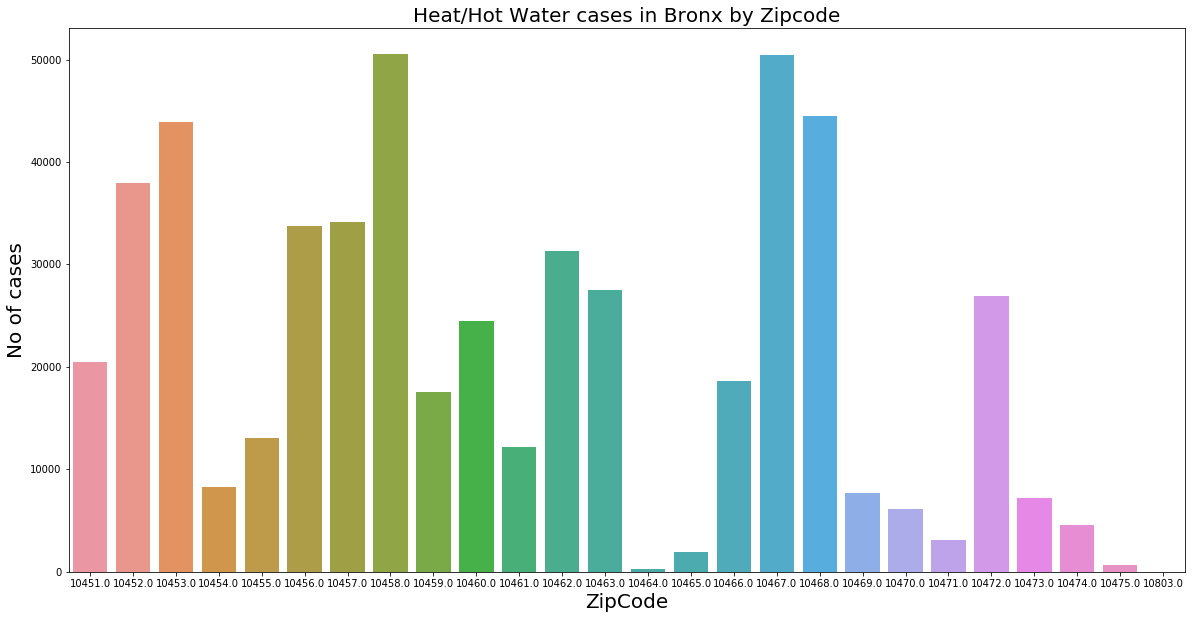

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(df3['incident_zip'])
plt.xlabel('ZipCode', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Heat/Hot Water cases in Bronx by Zipcode', size=20)

### Insight 3: 3810 BAILEY AVENUE have highest HOT/HEAT WATER incidents based on counts (Very sorry for small graph!)

In [39]:
df3['incident_address'].value_counts()

3810 BAILEY AVENUE                7109
1025 BOYNTON AVENUE               5750
2090 EAST TREMONT AVENUE          3660
888 GRAND CONCOURSE               2958
2968 PERRY AVENUE                 2621
2074 WALLACE AVENUE               2435
1030 BOYNTON AVENUE               2313
266 BEDFORD PARK BOULEVARD        2077
750 GRAND CONCOURSE               1950
30 BUCHANAN PLACE                 1913
2040 BRONXDALE AVENUE             1743
957 WOODYCREST AVENUE             1668
1425 DR M L KING JR BOULEVARD     1649
3605 SEDGWICK AVENUE              1543
2410 WASHINGTON AVENUE            1540
2645 MORRIS AVENUE                1512
2856 WEBB AVENUE                  1492
116 EAST MOSHOLU PARKWAY SOUTH    1383
3555 BRUCKNER BOULEVARD           1311
2995 BOTANICAL SQUARE             1129
1381 CASTLE HILL AVENUE           1128
2955 GRAND CONCOURSE              1089
530 EAST 169 STREET               1033
1225 SHERIDAN AVENUE               935
223 NAPLES TERRACE                 930
3200 DECATUR AVENUE      

(array([    0,     1,     2, ..., 21527, 21528, 21529]),
 <a list of 21530 Text xticklabel objects>)

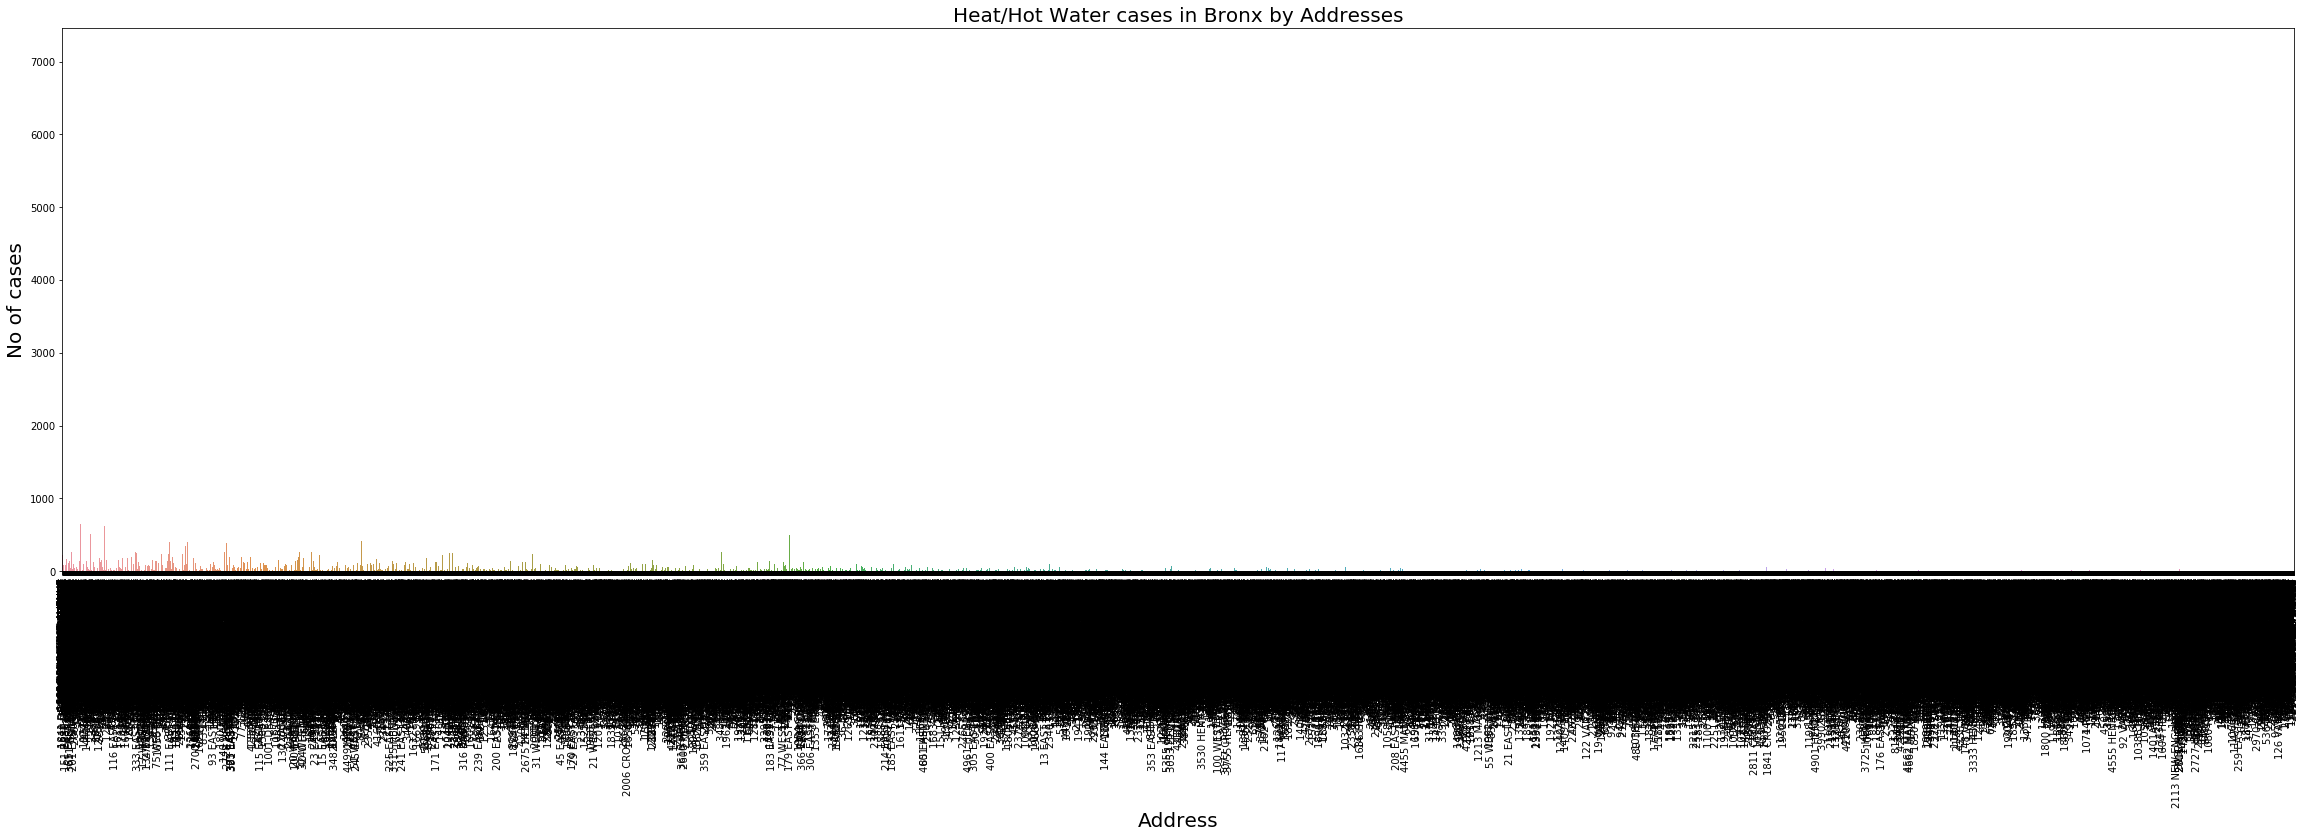

In [35]:
plt.figure(figsize=(40,10))
sns.countplot(df3['incident_address'])
plt.xlabel('Address', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Heat/Hot Water cases in Bronx by Addresses', size=20)
plt.xticks(rotation=90)

### These are the address details for Zipcode 10458 for HPD to take note of

In [36]:
df3[(df3['incident_zip'] == 10458) & (df['incident_address'])]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
189,ADDRESS,BRONX,BRONX,11/9/2015 5:24:18 PM,HEAT/HOT WATER,11/7/2015 8:23:56 PM,2995 BOTANICAL SQUARE,10458.0,40.867716,RESIDENTIAL BUILDING,-73.881612,The Department of Housing Preservation and Dev...,Closed,BOTANICAL SQUARE,31930602
1083,ADDRESS,BRONX,BRONX,11/10/2015 1:17:39 AM,HEAT/HOT WATER,11/7/2015 10:22:16 AM,170 EAST 205 STREET,10458.0,40.875234,RESIDENTIAL BUILDING,-73.885154,The Department of Housing Preservation and Dev...,Closed,EAST 205 STREET,31933269
1809,ADDRESS,BRONX,BRONX,11/8/2015 5:34:13 PM,HEAT/HOT WATER,11/7/2015 3:42:37 PM,2415 PROSPECT AVENUE,10458.0,40.854067,RESIDENTIAL BUILDING,-73.882522,The Department of Housing Preservation and Dev...,Closed,PROSPECT AVENUE,31935790
1851,ADDRESS,BRONX,BRONX,11/7/2015 6:00:29 PM,HEAT/HOT WATER,11/7/2015 8:43:22 AM,2970 BAINBRIDGE AVENUE,10458.0,40.870930,RESIDENTIAL BUILDING,-73.884423,The Department of Housing Preservation and Dev...,Closed,BAINBRIDGE AVENUE,31935891
2322,ADDRESS,BRONX,BRONX,11/10/2015 1:58:57 PM,HEAT/HOT WATER,11/8/2015 8:37:19 AM,304 EAST 183 STREET,10458.0,40.856750,RESIDENTIAL BUILDING,-73.898019,The Department of Housing Preservation and Dev...,Closed,EAST 183 STREET,31937414
2475,ADDRESS,BRONX,BRONX,11/9/2015 1:09:17 AM,HEAT/HOT WATER,11/8/2015 7:02:31 AM,636 EAST 187 STREET,10458.0,40.855013,RESIDENTIAL BUILDING,-73.886501,The complaint you filed is a duplicate of a co...,Closed,EAST 187 STREET,31938002
2488,ADDRESS,BRONX,BRONX,11/9/2015 5:24:18 PM,HEAT/HOT WATER,11/8/2015 9:33:46 PM,2995 BOTANICAL SQUARE,10458.0,40.867716,RESIDENTIAL BUILDING,-73.881612,The Department of Housing Preservation and Dev...,Closed,BOTANICAL SQUARE,31938023
2536,ADDRESS,BRONX,BRONX,11/10/2015 1:17:39 AM,HEAT/HOT WATER,11/8/2015 6:22:21 AM,2968 PERRY AVENUE,10458.0,40.870122,RESIDENTIAL BUILDING,-73.884005,The Department of Housing Preservation and Dev...,Closed,PERRY AVENUE,31938078
2548,ADDRESS,BRONX,BRONX,11/17/2015 1:19:31 AM,HEAT/HOT WATER,11/8/2015 10:29:40 PM,2627 WEBSTER AVENUE,10458.0,40.863315,RESIDENTIAL BUILDING,-73.889209,The Department of Housing Preservation and Dev...,Closed,WEBSTER AVENUE,31938091
2627,ADDRESS,BRONX,BRONX,11/11/2015 1:12:42 AM,HEAT/HOT WATER,11/8/2015 11:31:58 AM,2407 BEAUMONT AVENUE,10458.0,40.854409,RESIDENTIAL BUILDING,-73.884340,The Department of Housing Preservation and Dev...,Closed,BEAUMONT AVENUE,31938557


## Conclusion Remark: In terms of complaint numbers, Bronx borough has the highest heat/hot water cases. Department of Housing Preservation and Development can focus on Bronx borough, Zipcode 10458 and Address 3810 BAILEY AVENUE.

## Map of Bailey Avenue, Bronx, NYC courtesy from Google

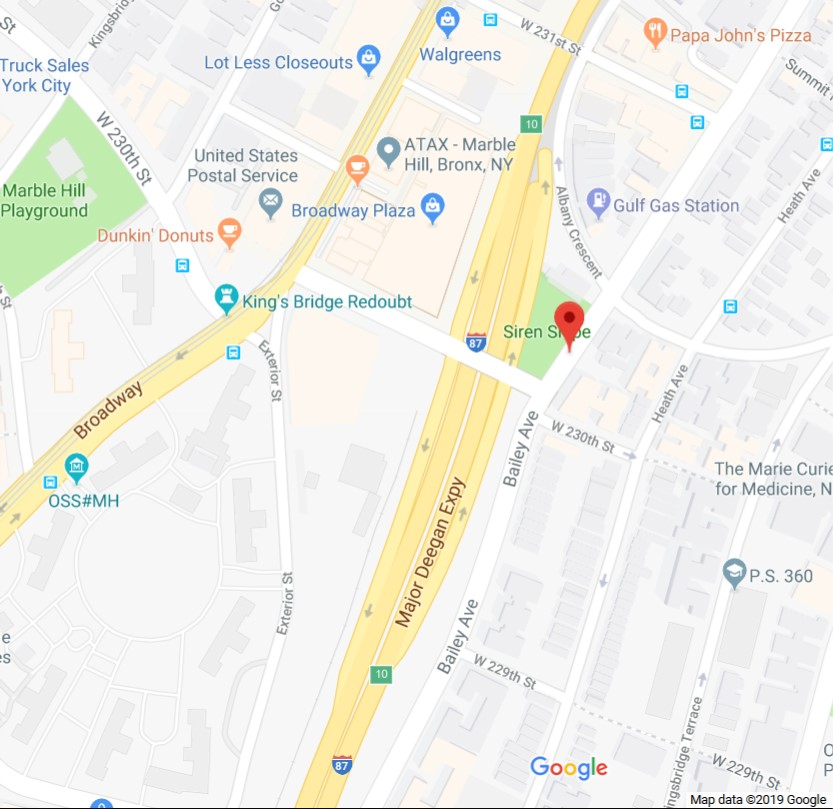

In [ ]:
df3.info()

In [ ]:
df3.shape

In [ ]:
df3.head()

In [ ]:
#Save this dataframe df3 to q2.csv
#df3.to_csv("q2.csv", index=False)

In [ ]:
#Check the new file
#new = pd.read_csv('q2.csv')
#new.head()